In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import json

In [2]:
os.chdir('/Users/cwagner2/Work/projects/covid/long-deletions/')

In [3]:
## Matplot lib settings
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica Neue'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize']= 14
mpl.rcParams['legend.fontsize']=12
mpl.rcParams['legend.title_fontsize']=14

## Load clades

In [4]:
def load_df(path):
    with open(path,'r') as f:
        df = pd.read_csv(f,sep='\t')
    df['aa_mutations'] = df.aa_mutations.str.split(';')
    df['nt_mutations'] = df.nt_mutations.str.split(';')
    df['codon_change'] = df.codon_change.str.split(';')
    df = df.explode(['aa_mutations','nt_mutations','codon_change'],ignore_index=True)
    df[['gene','aa_mutation']] = df['aa_mutations'].str.split(':',expand=True)
    df['residue'] = pd.to_numeric(df.aa_mutation.str[1:-1])
    return df
    

In [22]:
orf8 = load_df('usher/trimmed/clades/ORF8_clades.tsv')
spike = load_df('usher/trimmed/clades/S_clades.tsv')
orf1a = load_df('usher/trimmed/clades/ORF1a_clades.tsv')
S1 = spike[(spike.gene=='S')&(spike.residue >= 13)&(spike.residue<=685)]
orf8_nested = load_df('usher/trimmed/clades_nested/ORF8_clades.tsv')
spike_nested = load_df('usher/trimmed/clades_nested/S_clades.tsv')
orf1a_nested = load_df('usher/trimmed/clades_nested/ORF1a_clades.tsv')
S1_nested = spike_nested[(spike_nested.gene=='S')&(spike_nested.residue >= 14)&(spike_nested.residue<=685)]

In [23]:
for dataset in [orf8,spike,orf1a,S1,orf8_nested,spike_nested,orf1a_nested,S1_nested]:
    dataset['days'] = dataset['days_circulated']+1

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_47412/767953228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['days'] = dataset['days_circulated']+1
/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_47412/767953228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['days'] = dataset['days_circulated']+1


In [24]:
mutations = pd.read_csv('data/obermeyer_mutations.tsv',sep='\t')

In [25]:
mutations.columns

Index(['rank', 'mutation', 'mean/stddev', 'log10(P(ΔR > 1))', 'Δ log R',
       'Δ log R 95% ci lower', 'Δ log R 95% ci upper', 'R / R_A',
       'R / R_A 95% ci lower', 'R / R_A 95% ci upper', 'emerged in lineages'],
      dtype='object')

In [26]:
spike = spike.merge(mutations,how='left',left_on='aa_mutations',right_on='mutation').drop(columns='mutation')
spike_nested = spike_nested.merge(mutations,how='left',left_on='aa_mutations',right_on='mutation').drop(columns='mutation')

In [27]:
orf1a = orf1a.merge(mutations,how='left',left_on='aa_mutations',right_on='mutation').drop(columns='mutation')
orf1a_nested = orf1a_nested.merge(mutations,how='left',left_on='aa_mutations',right_on='mutation').drop(columns='mutation')

In [28]:
spike

,node_id,aa_mutations,nt_mutations,codon_change,mut_type,branch_muts_counts,gene,leaf_count,mut_count,mut_density,...,rank,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages
0,England/LIVE-9EBF7/2020|2020-04-04,ORF1a:N2155N,C6730T,AAC>AAT,missense,3,ORF1a,1,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,England/LIVE-9EBF7/2020|2020-04-04,S:A831V,C24054T,GCT>GTT,missense,3,S,1,3,3.0,...,1478.0,0.159254,0.110496,0.000075,-0.00085,0.001001,1.00008,0.99915,1.001,BA.1.5 (B.1.1.529.1.5)
2,England/LIVE-9EBF7/2020|2020-04-04,N:F110F,C28603T,TTC>TTT,missense,3,N,1,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,England/SHEF-D10CC/2020|2020-03-24,S:D1118Y,G24914T,GAC>TAC,missense,2,S,1,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,England/SHEF-D10CC/2020|2020-03-24,N:D348Y,G29315T,GAT>TAT,missense,2,N,1,2,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706486,101153|LR824375.2|2020-03-31,N:G116E,G28620A,GGG>GAG,missense,3,N,1,3,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706487,AUS/VIC749/2020|MT641704.1|2020-03-31,ORF1a:I368T,T1368C,ATT>ACT,synonymous,4,ORF1a,1,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706488,AUS/VIC749/2020|MT641704.1|2020-03-31,ORF1b:D202N,G14071A,GAT>AAT,synonymous,4,ORF1b,1,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
706489,AUS/VIC749/2020|MT641704.1|2020-03-31,ORF1b:D2423D,C20736T,GAC>GAT,synonymous,4,ORF1b,1,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
spike.columns

Index(['node_id', 'aa_mutations', 'nt_mutations', 'codon_change', 'mut_type',
       'branch_muts_counts', 'gene', 'leaf_count', 'mut_count', 'mut_density',
       'rev_from_lineage', 'days_circulated', 'parent', 'cluster',
       'aa_mutation', 'residue', 'days', 'rank', 'mean/stddev',
       'log10(P(ΔR > 1))', 'Δ log R', 'Δ log R 95% ci lower',
       'Δ log R 95% ci upper', 'R / R_A', 'R / R_A 95% ci lower',
       'R / R_A 95% ci upper', 'emerged in lineages'],
      dtype='object')

In [30]:
spike['R / R_A 95% ci lower']

0             NaN
1         0.99915
2             NaN
3             NaN
4             NaN
           ...   
706486        NaN
706487        NaN
706488        NaN
706489        NaN
706490        NaN
Name: R / R_A 95% ci lower, Length: 706491, dtype: float64

In [31]:
orf1a_nested.columns

Index(['node_id', 'aa_mutations', 'nt_mutations', 'codon_change', 'mut_type',
       'branch_muts_counts', 'gene', 'leaf_count', 'mut_count', 'mut_density',
       'rev_from_lineage', 'days_circulated', 'date_observed', 'parent',
       'cluster', 'aa_mutation', 'residue', 'days', 'rank', 'mean/stddev',
       'log10(P(ΔR > 1))', 'Δ log R', 'Δ log R 95% ci lower',
       'Δ log R 95% ci upper', 'R / R_A', 'R / R_A 95% ci lower',
       'R / R_A 95% ci upper', 'emerged in lineages'],
      dtype='object')

In [32]:
spike['fitness'] = np.where(spike['Δ log R 95% ci lower'] > 0, 'missense: fitness enhancing', 'missense: no fitness enhancement')
#spike['fitness'] = np.where(spike['R / R_A 95% ci upper'] < 1, 'missense: fitness reducing', spike['fitness'])
spike_nested['fitness'] = np.where(spike_nested['Δ log R 95% ci lower'] > 0, 'missense: fitness enhancing', 'missense: no fitness enhancement')
#spike_nested['fitness'] = np.where(spike_nested['R / R_A 95% ci upper'] < 1, 'missense: fitness reducing', spike_nested['fitness'])
orf1a['fitness'] = np.where(orf1a['Δ log R 95% ci lower'] > 0, 'missense: fitness enhancing', 'missense: no fitness enhancement')
#orf1a['fitness'] = np.where(orf1a['R / R_A 95% ci upper'] < 1, 'missense: fitness reducing', orf1a['fitness'])
orf1a_nested['fitness'] = np.where(orf1a_nested['Δ log R 95% ci lower'] > 0, 'missense: fitness enhancing', 'missense: no fitness enhancement')
#orf1a_nested['fitness'] = np.where(orf1a_nested['R / R_A 95% ci upper'] < 1, 'missense: fitness reducing', orf1a_nested['fitness'])


In [16]:
orf1a.head()

,node_id,aa_mutations,nt_mutations,codon_change,mut_type,branch_muts_counts,gene,leaf_count,mut_count,mut_density,...,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages,fitness
0,DP0803|LC571037.1|2020-02-17,ORF1a:V1299V,G4162T,GTG>GTT,synonymous,1,ORF1a,1,1,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missense: no fitness enhancement
1,node_2,ORF1a:D4275D,T13090C,GAT>GAC,synonymous,1,ORF1a,2,4,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missense: no fitness enhancement
2,node_4,ORF1a:D1939Y,G6080T,GAT>TAT,missense,1,ORF1a,2,2,1.00,...,25.04620,138.01700,0.041619,0.038362,0.044876,1.04250,1.039110,1.04590,AY.72 (B.1.617.2.72),missense: fitness enhancing
3,England/SHEF-CA0D5/2020|2020-04-02,ORF1a:V1583F,G5012T,GTT>TTT,missense,1,ORF1a,1,1,1.00,...,1.58147,1.21957,0.000481,-0.000115,0.001077,1.00048,0.999885,1.00108,"B.1.160.21, B.1.298",missense: no fitness enhancement
4,node_7,ORF1a:P2739S,C8480T,CCT>TCT,missense,1,ORF1a,4,1,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,missense: no fitness enhancement


In [19]:
spike[spike.fitness=='missense: fitness reducing']

,node_id,aa_mutations,nt_mutations,codon_change,mut_type,branch_muts_counts,gene,leaf_count,mut_count,mut_density,...,mean/stddev,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages,fitness


In [136]:
def fit_spike(df,var,title,path=None):
    if var == 'leaf_count':
        xscale='log'
        mean = classic_mean
        label = 'Mean: '
        xlabel = 'Cluster size'
        binner = log_bins
        offset = 0.5
        yscale='log'
    else:
        xscale='linear'
        mean = classic_mean
        label = 'Mean: '
        xlabel = 'Days circulated'
        binner = lin_bins
        offset=10
        yscale='log'
        
    fig, ax = plt.subplots(nrows=2,figsize=(8,4))
    
    null = df[(df.mut_type=='synonymous')&(df.branch_muts_counts==1)][var]
    fitter = df[df.fitness>10][var]
    dati = [null,fitter]
    for i, data in enumerate(dati):
        Min = min(data)
        Max = max(data)
        avg = mean(data)
        bins = binner(Min,Max)
        values,counts = np.unique(data,return_counts=True)

        if i == 0:
            ax[i,j].set_title(title)
            mut = 'synonymous'
        else:
            stat,p = st.mannwhitneyu(fitter, null,alternative='greater')
            ax[i,j].text(Max,counts[1],f'Mann Whitney U greater \nthan synonymous \npvalue: {p:.2e}',ha='right',va='top')
            mut = 'fitness enhancing missense mutations'
        
        ax[i,j].hist(data, bins=bins,label=mut)
        ax[i,j].set_xscale(xscale)
        ax[i,j].axvline(x=avg,linestyle='dashed',color='black',lw=1,zorder=2)
        ax[i,j].text(avg + offset,counts[0],label + str(np.round(avg,1)),va='top')
        ax[i,j].set_ylabel('Count')
        ax[i,j].set_yscale(yscale)
        ax[i,j].set_xlim(min(df[var]),max(df[var])+(0.1*max(df[var])))
        
       #axins = inset_axes(ax[i,j], width="100%", height="100%", bbox_to_anchor=(.3, .2, .6, .5),loc=4,bbox_transform=ax[i].transAxes)
        #axins.hist(data, bins = 10 ** np.linspace(np.log10(Min), np.log10(Max), 50),color=color[mut])
        #axins.set_yscale('log')
        #axins.set_xscale('log')

        ax[i].legend(frameon=False)
    ax[-1].set_xlabel(xlabel)
    #print(st.kruskal(data1,data2))

    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

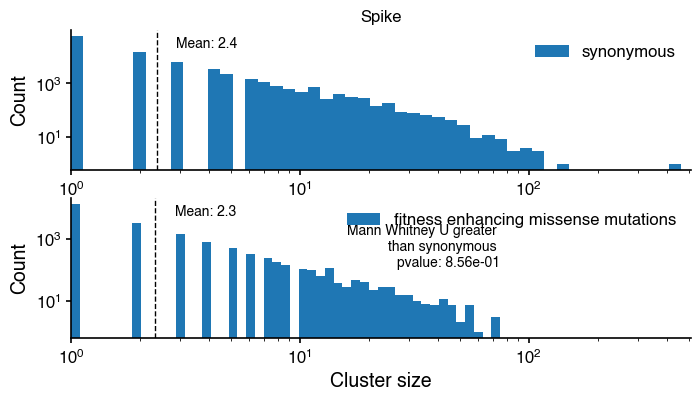

In [20]:
fit_spike(spike,'leaf_count','Spike')

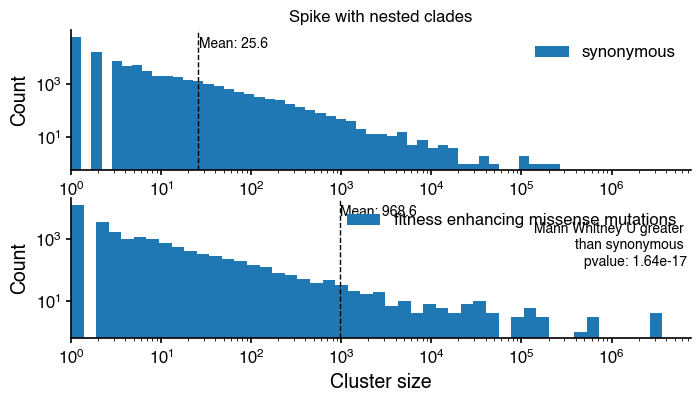

In [23]:
fit_spike(spike_nested,'leaf_count','Spike with nested clades')

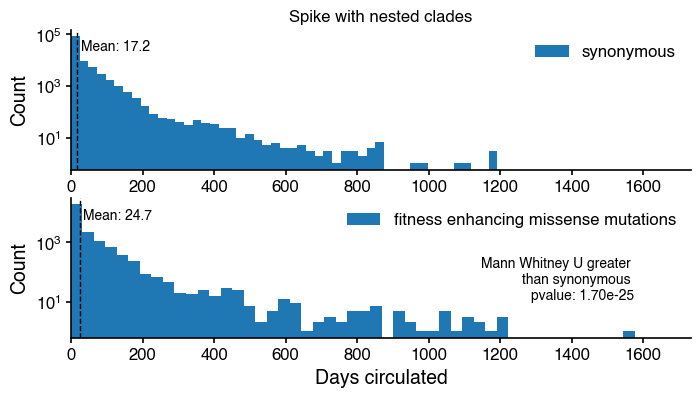

In [24]:
fit_spike(spike_nested,'days_circulated','Spike with nested clades')

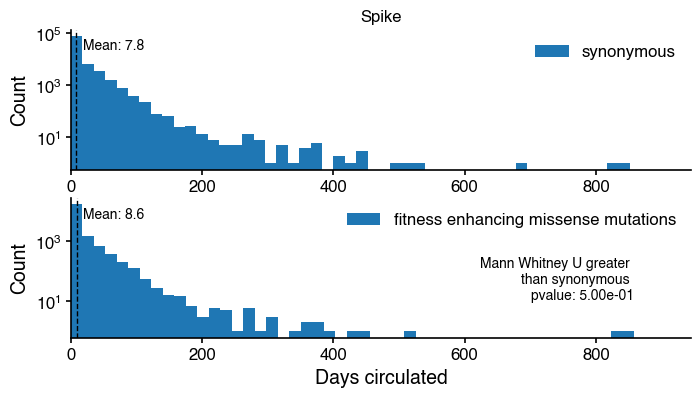

In [26]:
fit_spike(spike,'days_circulated','Spike')

In [7]:
S1_nested = spike_nested[spike_nested.aa_mutations.str.contains('S:[A-Za-z](1[4-9]|[2-5]\d|[6-9]\d{2}|6[0-7]\d|68[0-5])[A-Za-z]')]

/var/folders/b5/2grxct1x69395r8j6vkk07bc0000gp/T/ipykernel_55099/1442296037.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  S1_nested = spike_nested[spike_nested.aa_mutations.str.contains('S:[A-Za-z](1[4-9]|[2-5]\d|[6-9]\d{2}|6[0-7]\d|68[0-5])[A-Za-z]')]


In [134]:
spike.head()

,node_id,aa_mutations,nt_mutations,codon_change,mut_type,branch_muts_counts,gene,leaf_count,mut_count,mut_density,...,rank,fitness,log10(P(ΔR > 1)),Δ log R,Δ log R 95% ci lower,Δ log R 95% ci upper,R / R_A,R / R_A 95% ci lower,R / R_A 95% ci upper,emerged in lineages
0,England/LIVE-9EBF7/2020|2020-04-04,ORF1a:N2155N;S:A831V;N:F110F,C6730T;C24054T;C28603T,AAC>AAT;GCT>GTT;TTC>TTT,missense,3,S,1,3,3.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,England/SHEF-D10CC/2020|2020-03-24,S:D1118Y;N:D348Y,G24914T;G29315T,GAC>TAC;GAT>TAT,missense,2,S,1,2,2.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,node_14,S:H1101H,C24865T,CAC>CAT,synonymous,1,S,4,1,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,England/BRIS-1854DDE/2020|2020-10-19,S:D1260A,A25341C,GAC>GCC,missense,1,S,1,1,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,England/NORT-28171F/2020|OA965068.1|2020-03-19,S:P665P,C23557T,CCC>CCT,synonymous,1,S,1,1,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
def geom_mean(a):
    return st.gmean(a)

def strip_plot(df,variable):
    fig, ax = plt.subplots()
    sns.despine(bottom=True, left=True)

    # Show each observation with a scatterplot
    sns.stripplot(
        data=df, x=variable, y="mut_type", hue="mut_type",alpha=.05, zorder=1, legend=False
    )
    
    

    if variable == 'leaf_count':
        estimate = geom_mean
        ax.set_xscale('log')
    else:
        estimate = 'mean'
    # Show the conditional means, aligning each pointplot in the
    # center of the strips by adjusting the width allotted to each
    # category (.8 by default) by the number of hue levels
    sns.pointplot(
        data=df, x=variable, y="mut_type", hue="mut_type",
        join=False, palette="dark",
        markers="d", scale=.75, errorbar=None, estimator=estimate
    )

    # Improve the legend
    sns.move_legend(
        ax, loc="upper left", bbox_to_anchor=(1, 1),frameon=False
    )

from itertools import combinations

def run_tests(df):
    for m1, m2 in list(combinations(['synonymous','missense','nonsense'],2)):
        print('**'+m1 + ', ' + m2 + '**')
        for variable in ['leaf_count','days_circulated']:
            print(variable)
            print(st.mannwhitneyu(df[df.mut_type==m1][variable],df[df.mut_type==m2][variable]))
            print(st.brunnermunzel(df[df.mut_type==m1][variable],df[df.mut_type==m2][variable]))
        print('---------')

/Users/cwagner2/miniconda3/envs/orf8ko/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/cwagner2/miniconda3/envs/orf8ko/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/cwagner2/miniconda3/envs/orf8ko/lib/python3.10/site-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/Users/cwagner2/miniconda3/envs/orf8ko/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


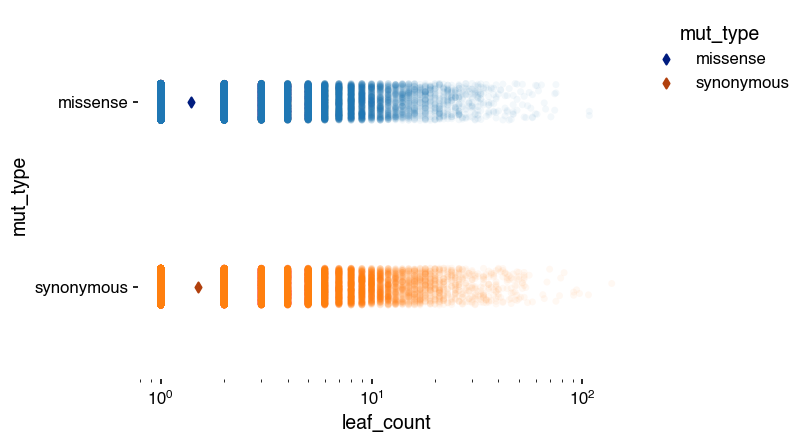

In [10]:
strip_plot(S1,'leaf_count')

In [50]:
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def geom_mean(a):
    return st.gmean(a)

def classic_mean(a):
    return np.average(a)
def log_bins(Min,Max):
    bins = 10 ** np.linspace(np.log10(Min), np.log10(Max), 50)
    return bins
def lin_bins(Min,Max):
    bins = np.linspace(Min,Max,50)
    return bins

def hist_plot(df,var,hyp1,hyp2,title,path=None):
    if var == 'leaf_count':
        xscale='log'
        mean = classic_mean
        label = 'Mean: '
        xlabel = 'Cluster size'
        binner = log_bins
        offset = 0.5
        yscale='log'
    else:
        xscale='linear'
        mean = classic_mean
        label = 'Mean: '
        xlabel = 'Days circulated'
        binner = lin_bins
        offset=10
        yscale='log'
        
    muts = ['synonymous','missense','nonsense']
    colors = ['#2ec4b6','#ff9f1c','#e71d36']
    color = dict(zip(muts,colors))
    fig, ax = plt.subplots(nrows=3,figsize=(8,6),sharex=True,sharey=True)
    for i, mut in enumerate(muts):
        data = df[(df.mut_type==mut)][var]
        Min = min(data)
        Max = max(data)
        avg = mean(data)
        bins = binner(Min,Max)
        values,counts = np.unique(data,return_counts=True)

        if mut == 'synonymous':
            data1 = data
            ax[i].set_title(title)
        #elif mut =='missense':
        #    data2 = data
        #else:
        #    data3 = data
        elif mut == 'missense':
        
            stat,p = st.mannwhitneyu(data, data1,alternative=hyp1)
            if hyp1 == 'two-sided':
                hyp1 = 'different'
        
            ax[i].text(Max,counts[1],f'Mann Whitney U {hyp1} \nthan synonymous \npvalue: {p:.2e}',ha='right',va='top')
        else:
            stat,p = st.mannwhitneyu(data,data1,alternative=hyp2)
            ax[i].text(Max,counts[1],f'Mann Whitney U {hyp2} \nthan synonymous \npvalue: {p:.2e}',ha='right',va='top')
            
       # if (title == 'Spike') & (mut == 'missense'):
        #    df['classify'] = np.where(df['fitness']>10,'fit',df['fitness'])
         #   df['classify'] = np.where(df['fitness']<0.1,'bad',df['classify'])
          #  df['classify'] = np.where(df['classify'].isna(),'neutral',df['classify'])
           # d1 = df[(df.mut_type=='missense')&(df.classify=='fit')&(df.branch_muts_counts==1)][var]
            #d2 = df[(df.mut_type=='missense')&(df.classify=='bad')&(df.branch_muts_counts==1)][var]
           # d3 = df[(df.mut_type=='missense')&(df.classify=='neutral')&(df.branch_muts_counts==1)][var]

        #    ax[i].hist([d1,d2,d3], bins=bins,color=[color['fit'],color['bad'],color['neutral']],label=['fit','bad','neutral'],stacked=True,density=True)
         #   ax[i].set_xscale(xscale)
            #ax[i].axvline(x=avg,linestyle='dashed',color='black',lw=1,zorder=2)
            #ax[i].text(avg + offset,counts[0],label + str(np.round(avg,1)),va='top')
          #  ax[i].set_ylabel('Count')
           # ax[i].set_yscale(yscale)
            #ax[i].set_xlim(min(df[var]),max(df[var])+(0.1*max(df[var])))
            
        #else:
        ax[i].hist(data, bins=bins,color=color[mut],label=mut)
        ax[i].set_xscale(xscale)
        ax[i].axvline(x=avg,linestyle='dashed',color='black',lw=1,zorder=2)
        ax[i].text(avg + offset,counts[2],label + str(np.round(avg,1)),va='top')
        ax[i].set_ylabel('Count')
        ax[i].set_yscale(yscale)
        ax[i].set_xlim(min(df[var]),max(df[var])+(0.1*max(df[var])))
        
       #axins = inset_axes(ax[i], width="100%", height="100%", bbox_to_anchor=(.3, .2, .6, .5),loc=4,bbox_transform=ax[i].transAxes)
        #axins.hist(data, bins = 10 ** np.linspace(np.log10(Min), np.log10(Max), 50),color=color[mut])
        #axins.set_yscale('log')
        #axins.set_xscale('log')

        ax[i].legend(frameon=False)
    ax[-1].set_xlabel(xlabel)
    #print(st.kruskal(data1,data2))

    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

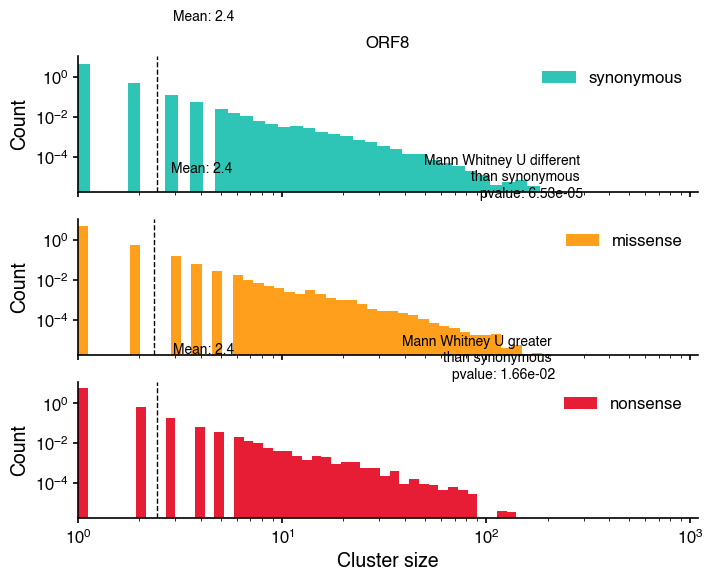

In [47]:
hist_plot(orf8,'leaf_count','two-sided','greater','ORF8')

In [48]:
S1.leaf_count.unique()

array([  1,   2,   3,   5,  13,   4,   8,  10,  34,  25,  12,   6,   7,
        20,  11,  18,   9,  50,  38,  16,  17,  14,  27,  15,  22,  23,
        39,  21,  99,  19, 108,  24,  30,  31,  44,  40,  28,  26,  32,
        33,  36,  49,  29,  35,  41,  45,  42,  66,  91,  97,  46,  47,
        37,  55,  52,  48,  74,  60,  58,  53,  59,  43,  51,  68,  88,
        56,  75, 101,  64, 100,  70,  54,  72,  65,  61,  62,  69, 105,
        73,  57, 110,  71,  79,  83,  94,  95,  89, 124])

IndexError: index 2 is out of bounds for axis 0 with size 2

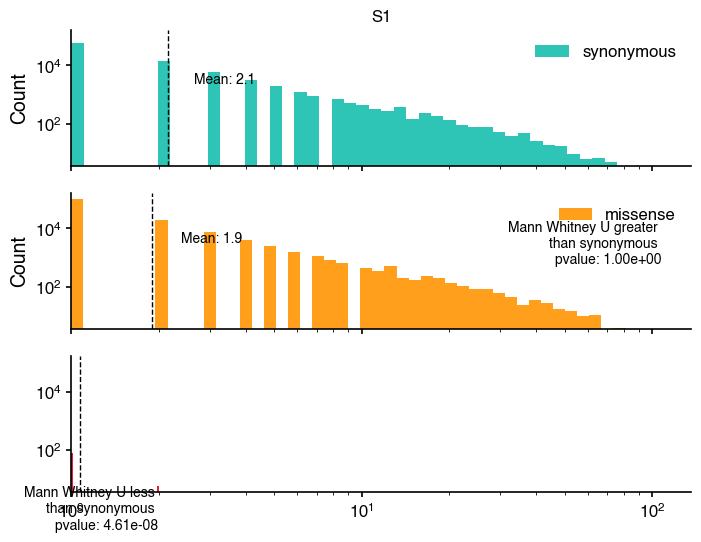

In [51]:
hist_plot(S1,'leaf_count','greater','less','S1')

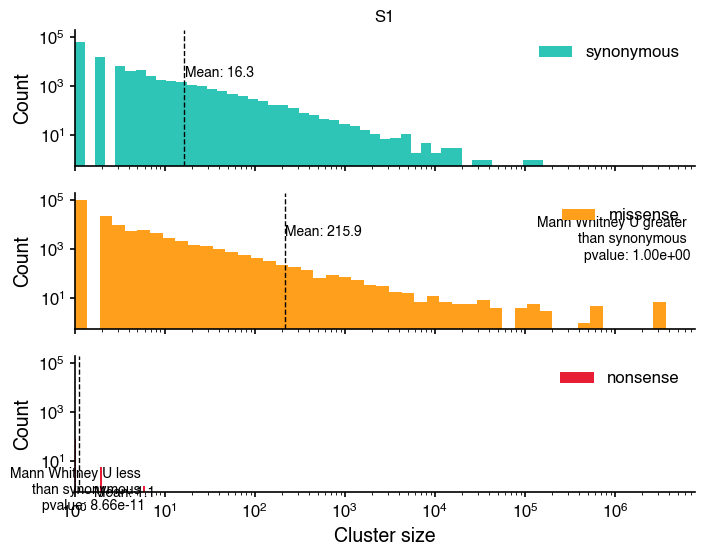

In [52]:
hist_plot(S1_nested,'leaf_count','greater','less','S1')

In [59]:
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def geom_mean(a):
    return st.gmean(a)

def classic_mean(a):
    return np.average(a)
def log_bins(Min,Max):
    bins = 10 ** np.linspace(np.log10(Min), np.log10(Max), 50)
    return bins
def lin_bins(Min,Max):
    bins = np.linspace(Min,Max,50)
    return bins

def draw_histogram(data,mean,binner,ax,color,lab):
    Min = min(data)
    Max = max(data)
    avg = mean(data)
    bins = binner(Min,Max)
    ax.hist(data, bins=bins,color=color[lab],label=lab,histtype='step',density=True)
    ax.axvline(x=avg,linestyle='dashed',color=color[lab],lw=1,zorder=2)
    #ax.text(avg + offset,counts[0],label + str(np.round(avg,1)),va='top')
    
def draw_ecdf(data, mean,ax,color,lab,scale):
    Min = min(data)
    Max = max(data)
    avg = mean(data)
    sns.ecdfplot(data,color=color[lab],label=lab,log_scale=scale,complementary=True,ax=ax)
    #ax.axvline(x=avg,linestyle='dashed',color=color[lab],lw=1,zorder=2)


def hist_plot(datasets,genes,hypotheses,path=None):
    muts = ['synonymous', 'missense','nonsense',]
    fitness = ['Missense: Increased fitness\n(Obermeyer et al)','Missense: Other']
    clabs = muts + fitness
    colors = ['#ff9f1c','#2ec4b6','#e71d36','#4D4D4D','#D3D3D3']
    color = dict(zip(clabs,colors))
    reversecolor = dict(zip(colors,clabs))
    newLabels, newHandles = [], []
    fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(8,6), sharey=True,tight_layout=True)
    alts  = ['less','greater','two-sided']
    ways = ['<','>','!=']
    way_mapper = dict(zip(alts,ways))
    
    for i, var in enumerate(['leaf_count','days_circulated']):
        if var == 'leaf_count':
            xscale=True
            mean = classic_mean
            label = 'Mean: '
            xlabel = 'Number of descendants'
            binner = log_bins
            offset = 0.5
            yscale='log'
        else:
            xscale=False
            mean = classic_mean
            label = 'Mean: '
            xlabel = 'Days circulated'
            binner = lin_bins
            offset=10
            yscale='log'
       
        for j, (df,gene,hyp) in enumerate(zip(datasets,genes,hypotheses)):
            pvalues = []
            directions = []
            colored = []

            if j==2:
                for mut in muts:
                    data = df[(df.mut_type==mut)&(df.gene==gene)][var]
                    draw_ecdf(data,mean,ax[i,j],color,mut,xscale)

                    if mut == 'synonymous':
                        data1 = data
                    else:
                        hyp = hypotheses[gene][mut]
                        stat,p = st.brunnermunzel(data, data1,alternative=hyp)
                        pvalues.append(p)
                        directions.append(way_mapper[hyp])
                        colored.append(color[mut])

                data = df[(df.fitness=='missense: fitness enhancing')&(df.gene==gene)][var]
                draw_ecdf(data,mean,ax[i,j],color,'Missense: Increased fitness\n(Obermeyer et al)',xscale)
                stat,p = st.brunnermunzel(data, data1,alternative='greater')
                pvalues.append(p)
                directions.append(way_mapper['greater'])
                colored.append(color['Missense: Increased fitness\n(Obermeyer et al)'])


                data = df[(df.fitness=='missense: no fitness enhancement')&(df.gene==gene)][var]
                draw_ecdf(data,mean,ax[i,j],color,'Missense: Other',xscale)
                stat,p = st.brunnermunzel(data, data1,alternative='less')
                pvalues.append(p)
                directions.append(way_mapper['less'])
                colored.append(color['Missense: Other'])

            else:
                for mut in muts:
                    data = df[(df.mut_type==mut)& (df.gene==gene)][var]
                    draw_ecdf(data,mean,ax[i,j],color,mut,xscale)

                    if mut == 'synonymous':
                        data1 = data
                    else:
                        hyp = hypotheses[gene][mut]
                        stat,p = st.brunnermunzel(data, data1,alternative=hyp)
                        pvalues.append(p)
                        directions.append(way_mapper[hyp])
                        colored.append(color[mut])  

            for p, c in zip(pvalues,colored):
                print(p)
                print(c)
            ax[i,j].set_yscale(yscale)
            ax[i,j].set_xlim(min(df[var]),max(df[var])+(0.1*max(df[var])))
            ax[0,j].set_title(gene)
            ax[i,j].set_xlabel('')
            ax[i,j].set_ylabel('')
            handles, labels = ax[i,j].get_legend_handles_labels()

            for handle, label in zip(handles, labels):
                if label not in newLabels:
                    newLabels.append(label)
                    newHandles.append(handle)
        ax[i,1].set_xlabel(xlabel)   
    ax[0,0].set_ylabel('Empirical complementary\ncumulative density')
    ax[1,0].set_ylabel('Empirical complementary\ncumulative density')
    
    
    fig.legend(newHandles, newLabels, bbox_to_anchor=(1.35,0.65),frameon=False)

    if path:
        fig.savefig(path,dpi=300,bbox_inches='tight')

In [34]:
nested = pd.concat([orf8_nested,spike_nested,orf1a_nested])

In [36]:
nested.gene.unique()

array(['ORF8', 'M', 'ORF1a', 'ORF1b', 'N', 'ORF9b', 'E', 'S', 'ORF6',
       'ORF7a', 'ORF7b', 'ORF3a'], dtype=object)

In [39]:
density = nested[nested.gene.isin(['ORF8','S','ORF1a'])][['node_id','aa_mutations','nt_mutations','mut_type','gene','leaf_count','days_circulated','fitness']]

density.to_csv('figs/supplemental/S6_SourceData.tsv',sep='\t',index=False)


In [33]:
hypotheses = {'ORF8':{'nonsense':'greater','missense':'greater'},'ORF1a':{'missense':'less','nonsense':'less'},'S':{'nonsense':'less','missense':'greater'}}

0.055822485545279785
#2ec4b6
5.5403702000683094e-09
#e71d36
1.0
#2ec4b6
0.0
#e71d36
0.0
#2ec4b6
0.0
#e71d36
1.3395825251940113e-07
#4D4D4D
0.0
#D3D3D3
0.011600077407692774
#2ec4b6
2.241345547216749e-08
#e71d36
1.0
#2ec4b6
0.0
#e71d36
0.0
#2ec4b6
0.0
#e71d36
2.013981608118837e-10
#4D4D4D
0.0
#D3D3D3


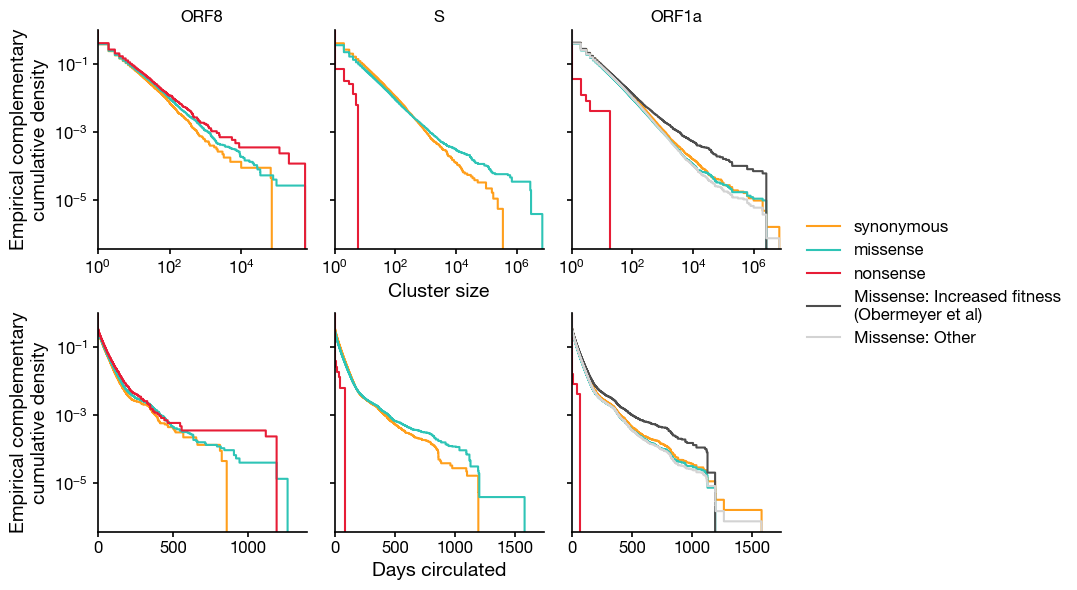

In [61]:
hist_plot([orf8_nested,spike_nested,orf1a_nested],['ORF8','S','ORF1a'],hypotheses,path='figs/supplemental/ecdf_clusters.pdf')

0.055822485545279785
#2ec4b6
5.5403702000683094e-09
#e71d36
1.0
#2ec4b6
0.0
#e71d36
0.0
#2ec4b6
0.0
#e71d36
1.3395825251940113e-07
#4D4D4D
0.0
#D3D3D3
0.011600077407692774
#2ec4b6
2.241345547216749e-08
#e71d36
1.0
#2ec4b6
0.0
#e71d36
0.0
#2ec4b6
0.0
#e71d36
2.013981608118837e-10
#4D4D4D
0.0
#D3D3D3


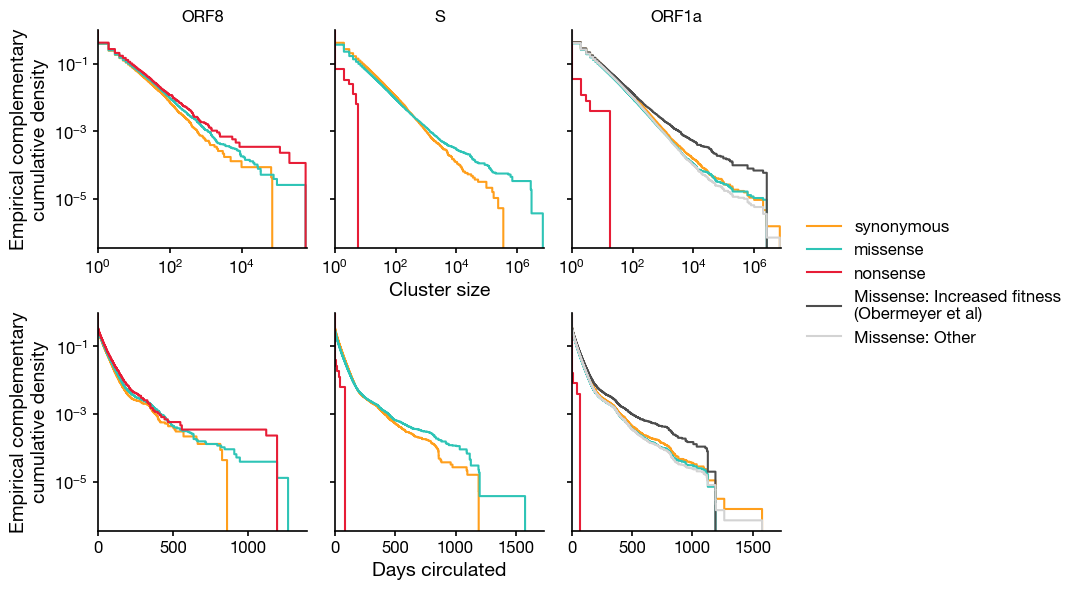

In [62]:
hist_plot([orf8_nested,spike_nested,orf1a_nested],['ORF8','S','ORF1a'],hypotheses,path='figs/supplemental/ecdf_clusters.jpg')

synonymous
missense
nonsense
synonymous
missense
nonsense


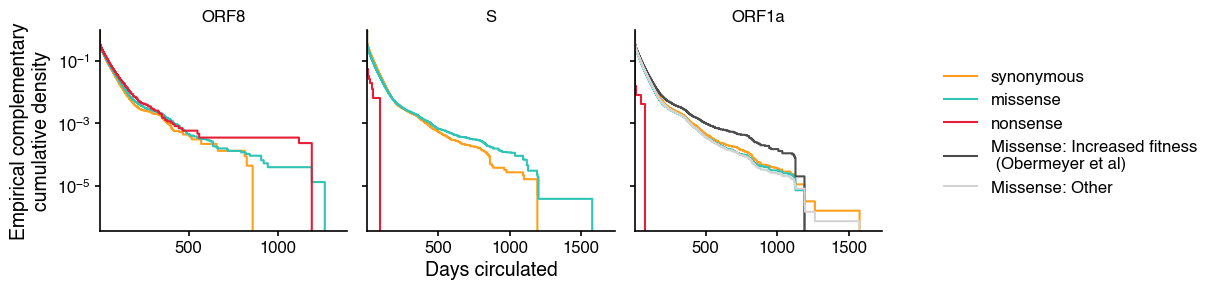

In [43]:
hist_plot([orf8_nested,spike_nested, orf1a_nested],'days',['ORF8','S','ORF1a'],hypotheses,path='figs/ecdf.pdf')

0.03651624314837816
>
nonsense
0.06442705759274175
>
missense
0.0
<
nonsense
0.0
<
missense
0.4164662955363724
>
Obermeyer et al muts
0.0
<
nonsense
1.0
>
missense
5.947822418348686e-14
>
Obermeyer et al muts


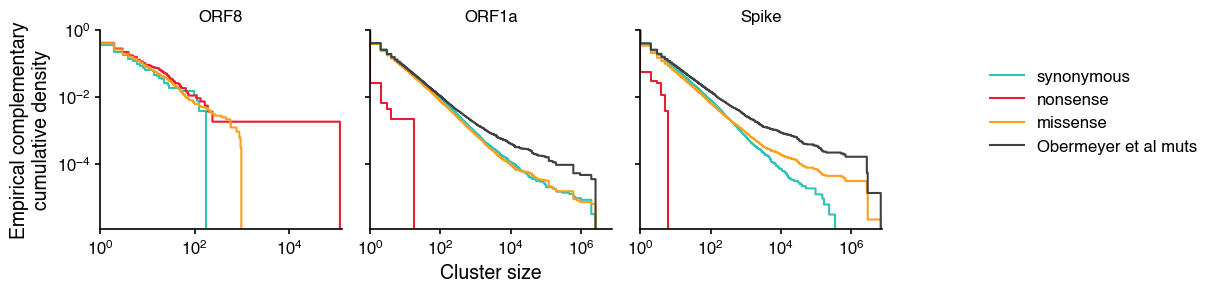

In [41]:
#hist_plot([orf8_nested[(orf8_nested.aa_mutations.str.contains('ORF8:Q27*'))|(orf8_nested.aa_mutations.str.contains('ORF8:G8*'))],orf1a_nested,spike_nested],'leaf_count',['ORF8','ORF1a','Spike'],hypotheses,path='figs/fig3/size_ecdf_noalphaXBB.pdf')
hist_plot([orf8_nested[(orf8_nested.aa_mutations.str.contains('ORF8:G8*'))],orf1a_nested,spike_nested],'leaf_count',['ORF8','ORF1a','Spike'],hypotheses,path='figs/fig3/size_ecdf_noalphaXBB.pdf')

0.0802381770858718
>
nonsense
0.18213979566932031
>
missense
0.0
<
nonsense
0.0
<
missense
0.039657118305359826
>
Obermeyer et al muts
0.0
<
nonsense
1.0
>
missense
5.801288107772292e-25
>
Obermeyer et al muts


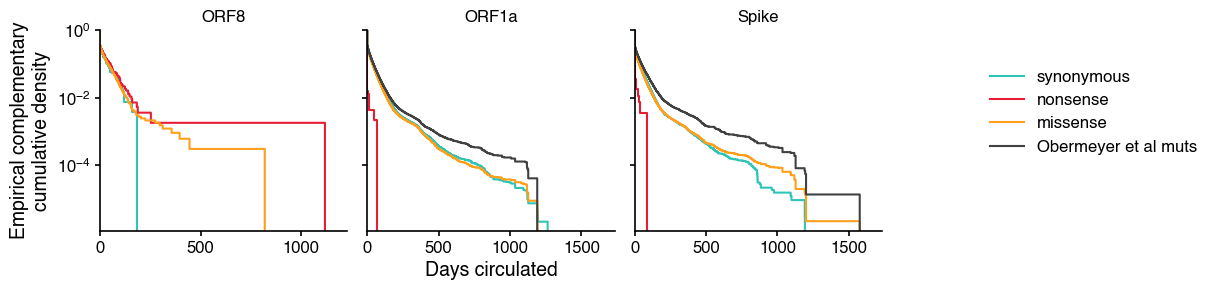

In [40]:
#hist_plot([orf8_nested[(orf8_nested.aa_mutations.str.contains('ORF8:Q27*'))|(orf8_nested.aa_mutations.str.contains('ORF8:G8*'))],orf1a_nested,spike_nested],'days_circulated',['ORF8','ORF1a','Spike'],hypotheses,path='figs/fig3/time_ecdf_noalphaXBB.pdf')
hist_plot([orf8_nested[(orf8_nested.aa_mutations.str.contains('ORF8:G8*'))],orf1a_nested,spike_nested],'days_circulated',['ORF8','ORF1a','Spike'],hypotheses,path='figs/fig3/time_ecdf_noalphaXBB.pdf')

In [35]:
for mut in ['synonymous','missense','nonsense']:
    size = orf8_nested[orf8_nested.mut_type==mut]['leaf_count']
    days = orf8_nested[orf8_nested.mut_type==mut]['days_circulated']
    print(mut)
    print('size')
    print(np.mean(size))
    print(np.std(size))
    print(st.iqr(size))
    print(np.percentile(size,75))
    print('days')
    print(np.mean(days))
    print(np.std(days))
    print(st.iqr(days))
    print(np.percentile(days,75))

synonymous
size
6.955027593302778
423.84388912757305
1.0
2.0
days
9.469142269198391
28.89057498859692
4.0
4.0
missense
size
18.46170549523783
2481.991994676751
1.0
2.0
days
10.273740038319495
32.13960312831399
4.0
4.0
nonsense
size
77.58225970896284
6024.185789920811
1.0
2.0
days
11.500463434980073
34.9840598311972
6.0
6.0


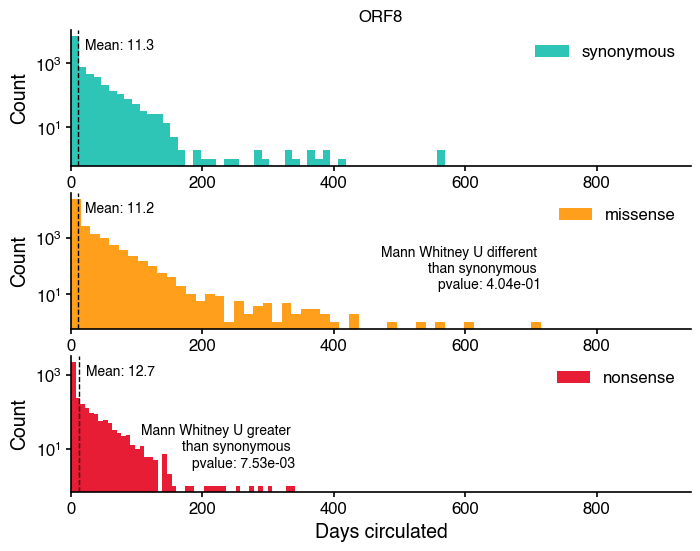

In [114]:
hist_plot(orf8,'days_circulated','two-sided','greater','ORF8')

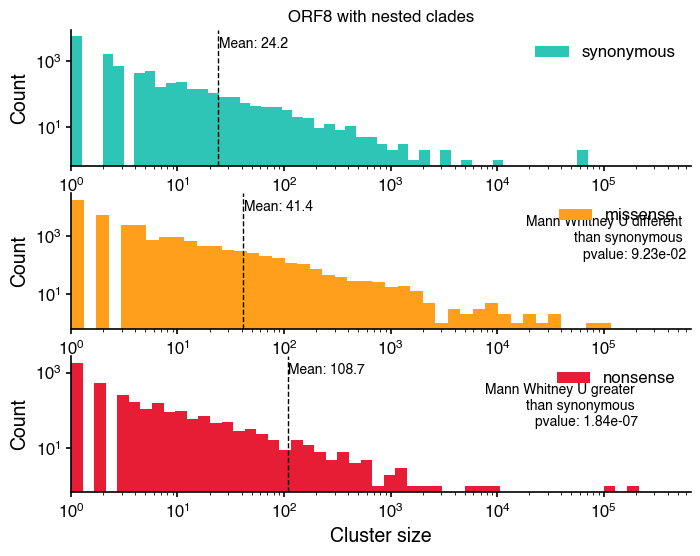

In [100]:
hist_plot(orf8_nested,'leaf_count','two-sided','greater','ORF8 with nested clades')

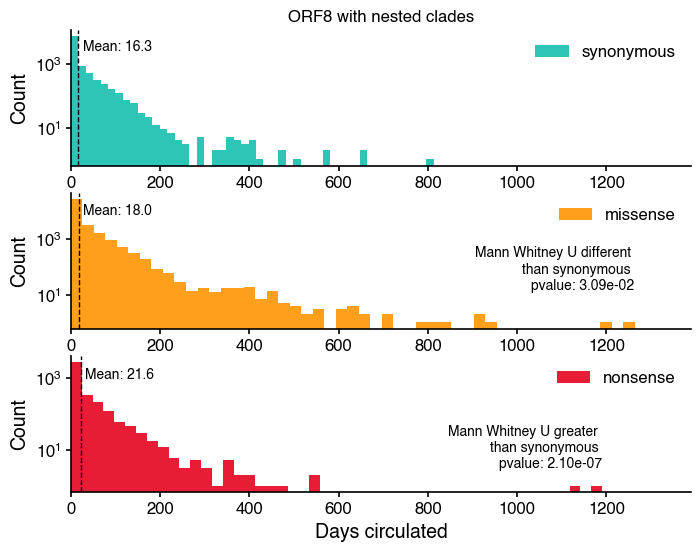

In [115]:
hist_plot(orf8_nested,'days_circulated','two-sided','greater','ORF8 with nested clades')

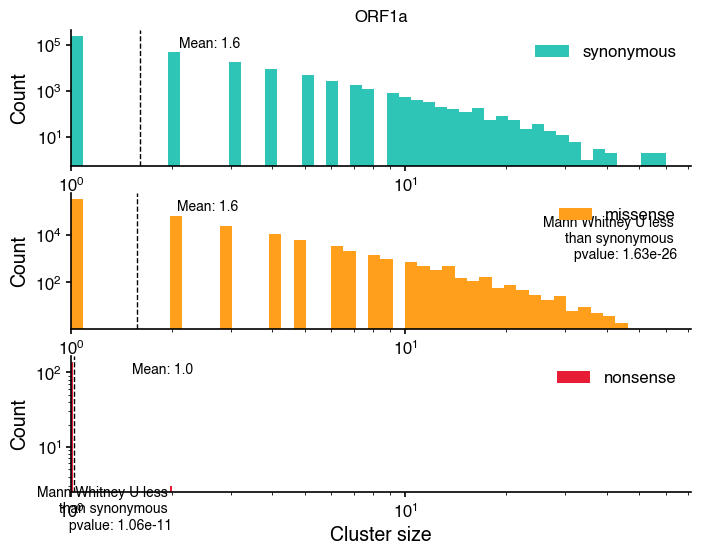

In [101]:
hist_plot(orf1a,'leaf_count','less','less','ORF1a')

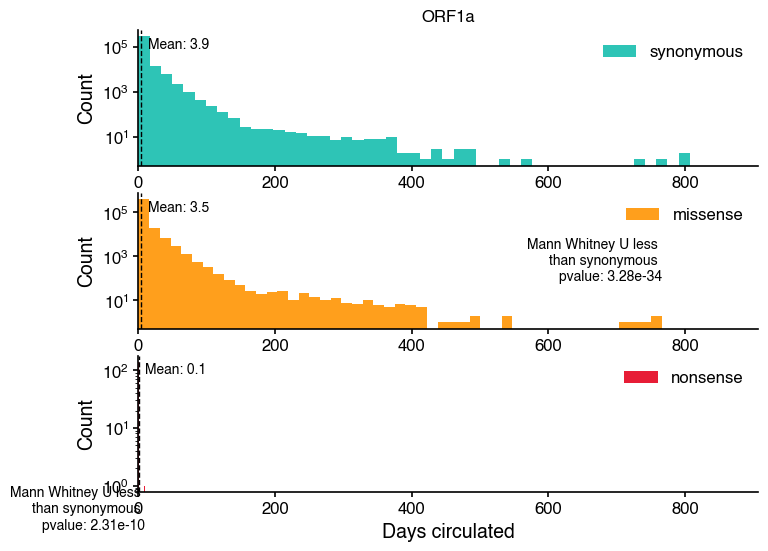

In [116]:
hist_plot(orf1a,'days_circulated','less','less','ORF1a')

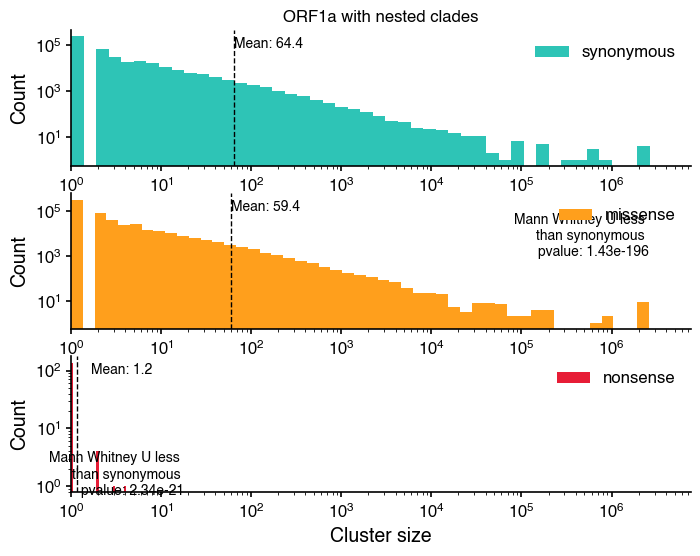

In [102]:
hist_plot(orf1a_nested,'leaf_count','less','less','ORF1a with nested clades')

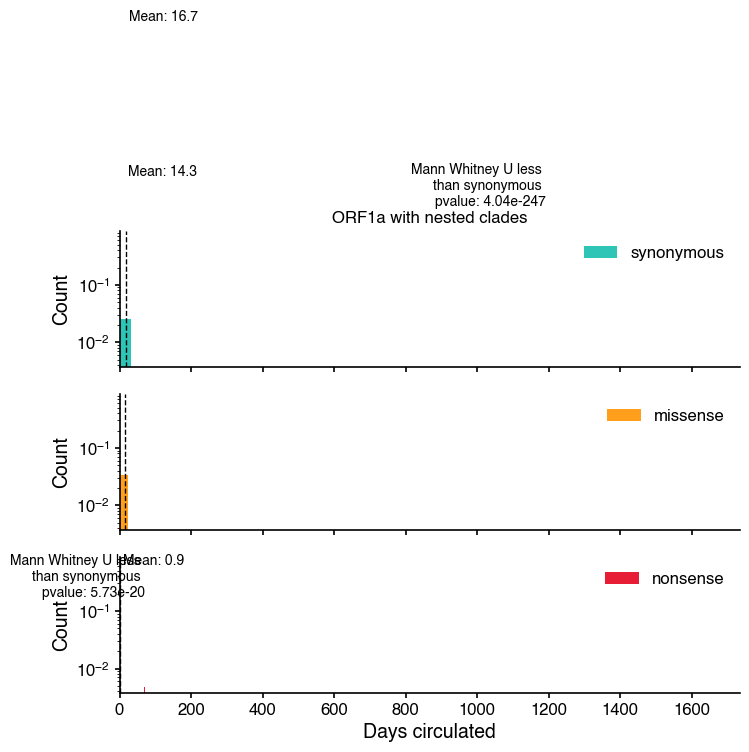

In [41]:
hist_plot(orf1a_nested,'days_circulated','less','less','ORF1a with nested clades')

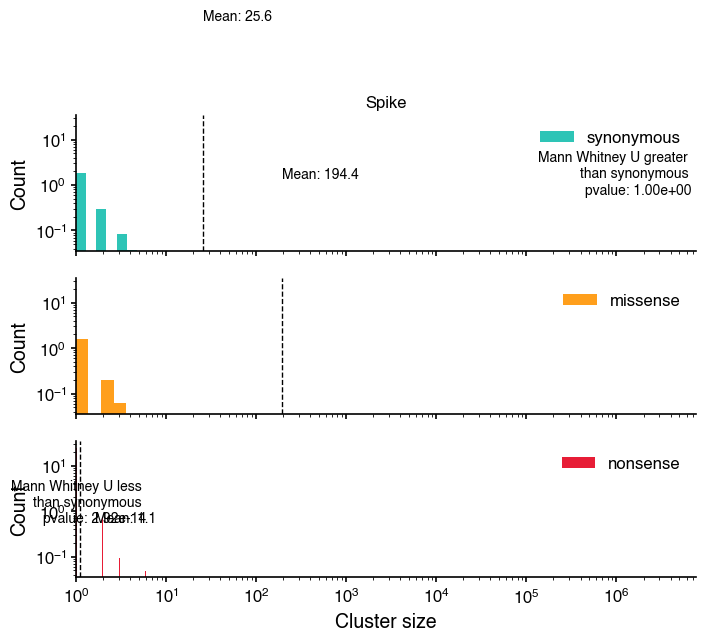

In [40]:
hist_plot(spike_nested,'leaf_count','greater','less','Spike')

ValueError: min() arg is an empty sequence

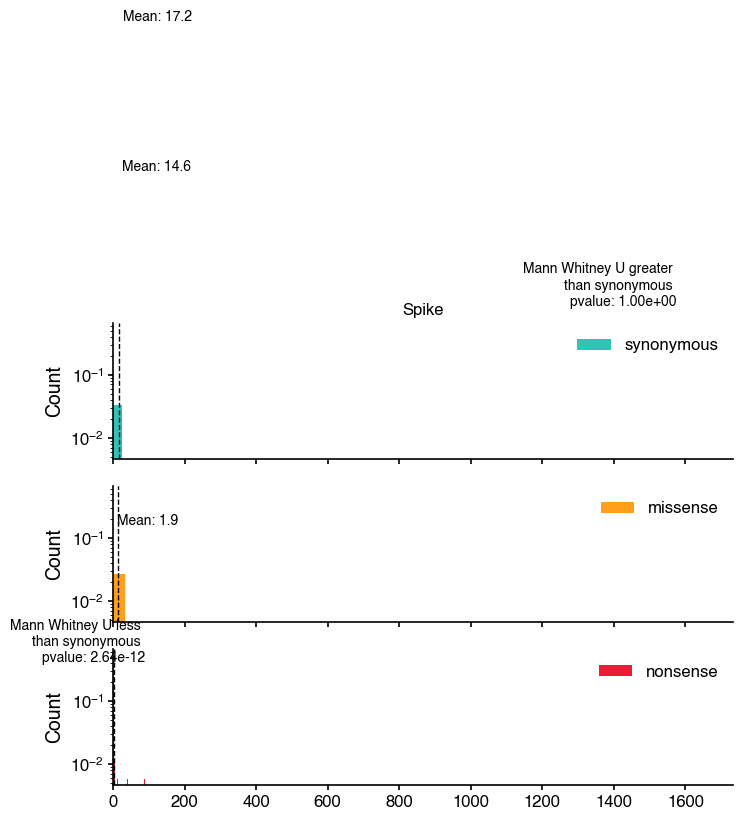

In [29]:
hist_plot(spike_nested,'days_circulated','greater','less','Spike')

ValueError: min() arg is an empty sequence

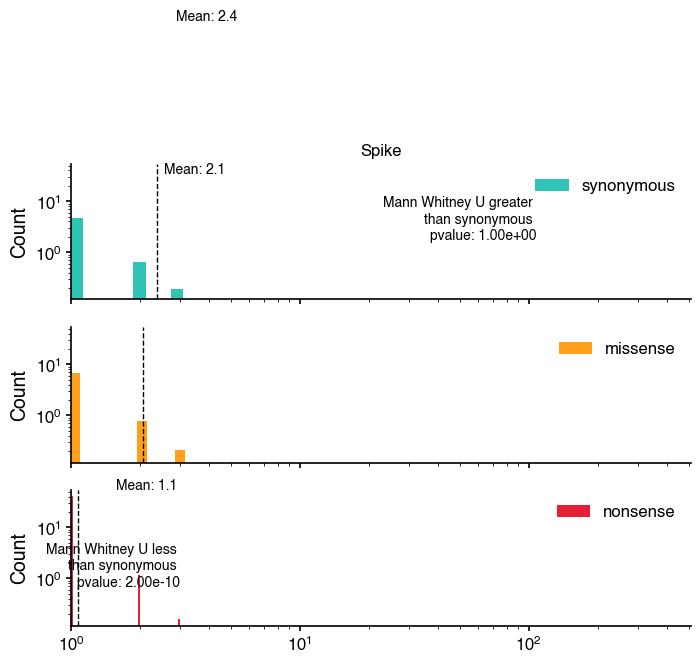

In [30]:
hist_plot(spike,'leaf_count','greater','less','Spike')

ValueError: min() arg is an empty sequence

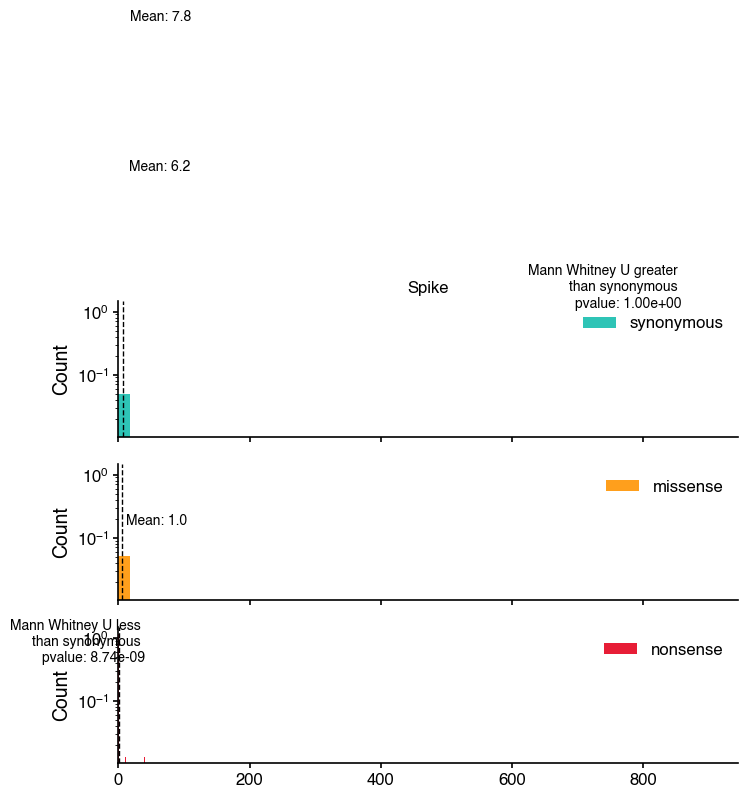

In [31]:
hist_plot(spike,'days_circulated','greater','less','Spike')

In [ ]:
hist_plot(spike_nested,'leaf_count','greater','less','Spike with nested clades')

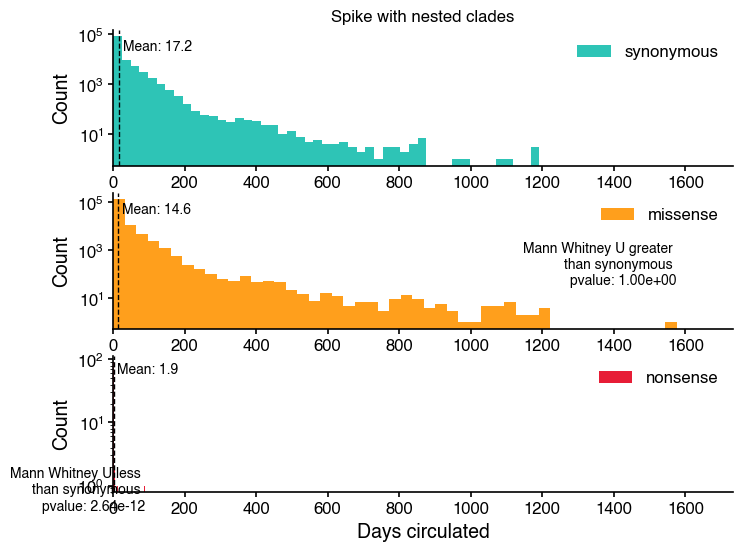

In [110]:
hist_plot(spike_nested,'days_circulated','greater','less','Spike with nested clades')

In [33]:
S1

,node_id,aa_mutations,nt_mutations,codon_change,mut_type,branch_muts_counts,gene,leaf_count,mut_count,mut_density,rev_from_lineage,days_circulated,parent,cluster,aa_mutation,residue,days
7,England/NORT-28171F/2020|OA965068.1|2020-03-19,S:P665P,C23557T,CCC>CCT,synonymous,1,S,1,1,1.0,0,0,node_42,5,P665P,665,1
8,England/SHEF-CD649/2020|2020-04-22,S:W64L,G21753T,TGG>TTG,missense,1,S,1,1,1.0,0,0,node_45,6,W64L,64,1
11,Rodent/CHN/C57MA14/2020|OL913104.1|2020-08-26,S:K417T,A22812C,AAG>ACG,missense,3,S,1,4,4.0,0,0,node_47,7,K417T,417,1
12,node_48,S:D290E,C22432G,GAC>GAG,missense,1,S,2,2,1.0,0,23,node_1,8,D290E,290,24
14,England/CAMB-7BF8B/2020|FR999505.1|2020-04-05,S:K462K,A22948G,AAA>AAG,synonymous,1,S,1,1,1.0,0,0,node_53,10,K462K,462,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706459,node_1421919,S:E583D,G23311T,GAG>GAT,missense,2,S,2,2,1.0,0,13,node_1,399741,E583D,583,14
706477,England/BRIS-12E5EE/2020|OA964794.1|2020-04-20,S:F32F,C21658T,TTC>TTT,synonymous,2,S,1,2,2.0,0,0,node_1421941,399747,F32F,32,1
706480,env/CHN/IVDC-HBF54-P3/2020|C_AA002300.1|2020-0...,S:G413G,G22801A,GGG>GGA,synonymous,2,S,1,2,2.0,0,0,node_1,399749,G413G,413,1
706482,Wuhan_C5/human/2020/CHN|GWHALRI01000001|2020-0...,S:L518L,A23116T,CTA>CTT,synonymous,1,S,1,1,1.0,0,0,node_1,399751,L518L,518,1


ValueError: min() arg is an empty sequence

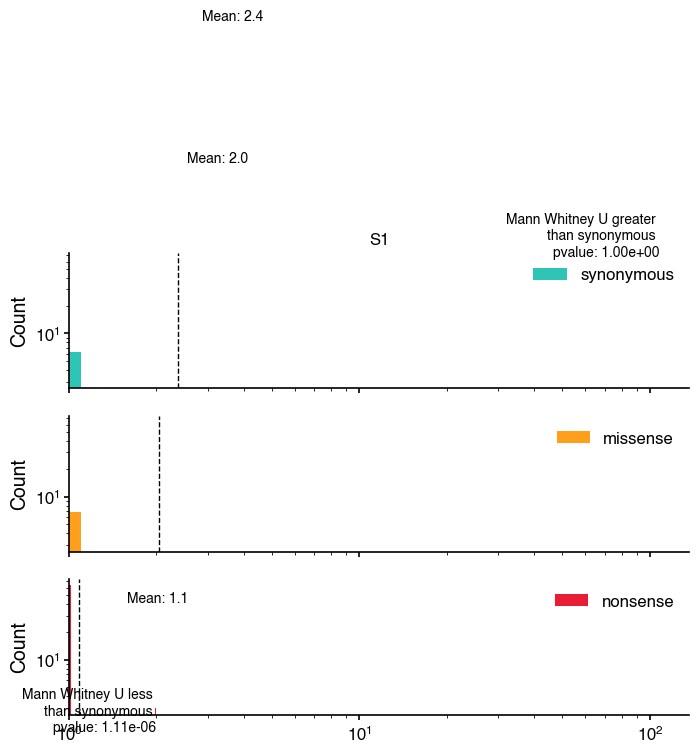

In [32]:
hist_plot(S1,'leaf_count','greater','less','S1')

ValueError: min() arg is an empty sequence

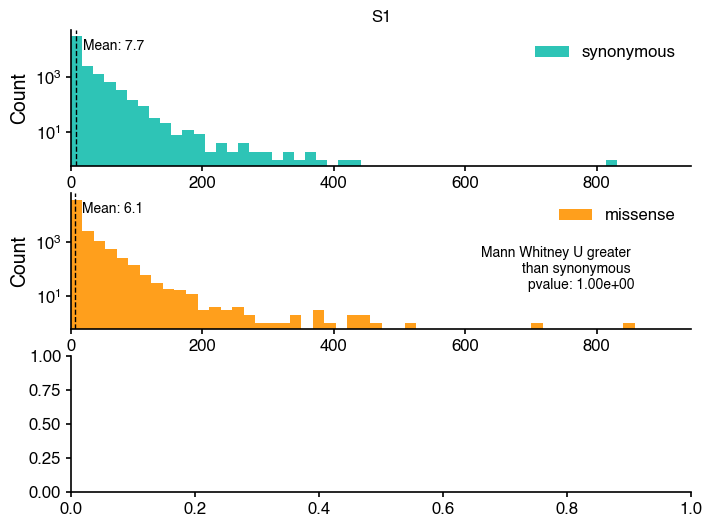

In [111]:
hist_plot(S1,'days_circulated','greater','less','S1')

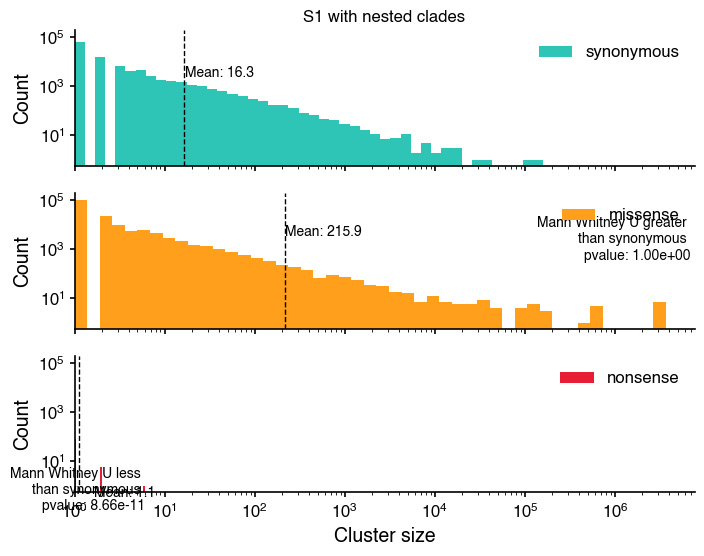

In [62]:
hist_plot(S1_nested,'leaf_count','greater','less','S1 with nested clades')

ValueError: min() arg is an empty sequence

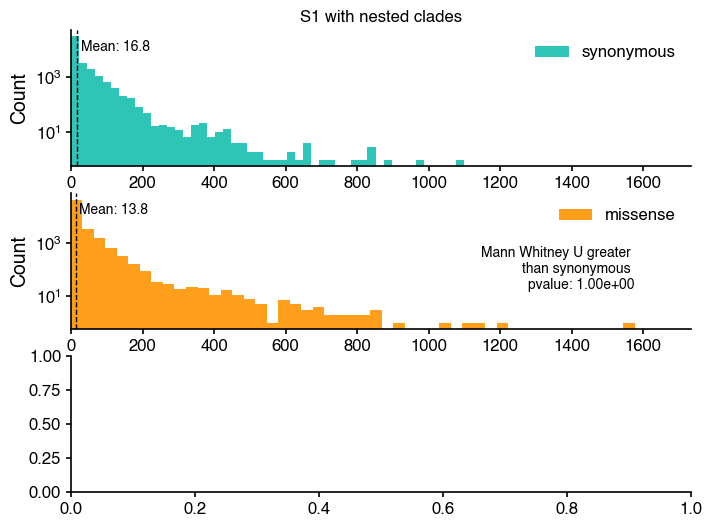

In [112]:
hist_plot(S1_nested,'days_circulated','greater','less','S1 with nested clades')

In [71]:
st.brunnermunzel(S1_nested[(S1_nested.mut_type=='missense')&(S1_nested.branch_muts_counts==1)]['leaf_count'],S1_nested[(S1_nested.mut_type=='synonymous')&(S1_nested.branch_muts_counts==1)]['leaf_count'],alternative='greater')

BrunnerMunzelResult(statistic=22.979216993175612, pvalue=1.0)

In [54]:
def plot_ecdf(data,var,title=''):
    ax = sns.ecdfplot(data,x=var,hue='mut_type',log_scale=True,complementary=True)
    ax.set_yscale('log')
    ax.set_title(title)
    

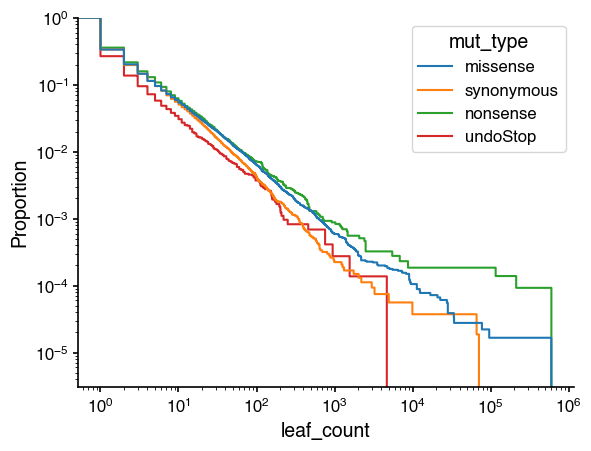

In [55]:
plot_ecdf(orf8_nested,'leaf_count')

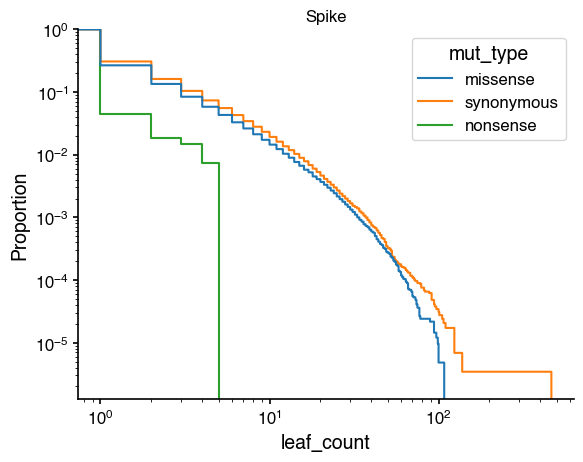

In [56]:
plot_ecdf(spike,'leaf_count','Spike')

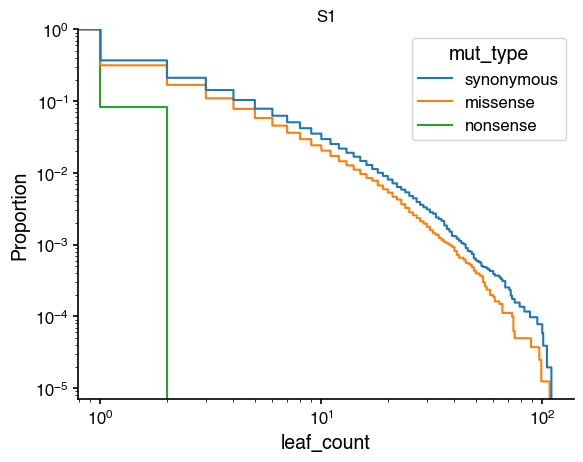

In [57]:
plot_ecdf(S1[S1.branch_muts_counts==1],'leaf_count','S1')

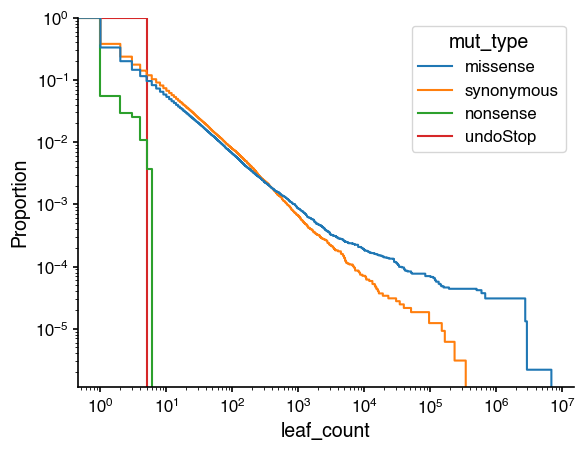

In [63]:
plot_ecdf(spike_nested,'leaf_count')

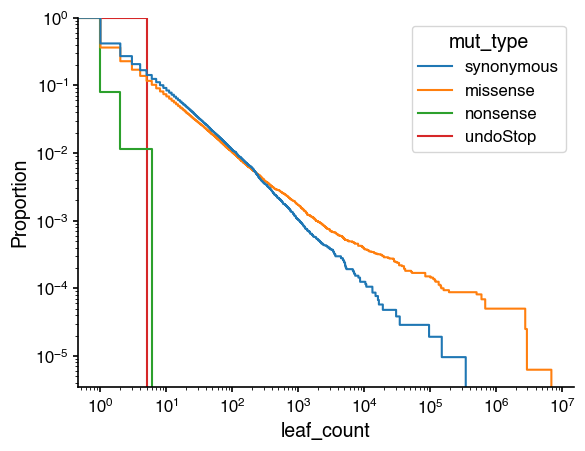

In [64]:
plot_ecdf(S1_nested,'leaf_count')

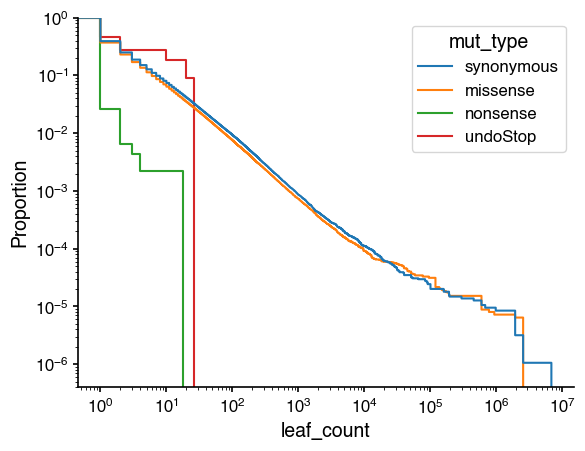

In [60]:
plot_ecdf(orf1a_nested,'leaf_count')

In [230]:
spike.head()

,node_id,aa_mutations,nt_mutations,codon_change,mut_type,branch_muts_counts,gene,leaf_count,mut_count,mut_density,rev_from_lineage,days_circulated,parent,cluster
2,England/LIVE-9EBF7/2020|2020-04-04,ORF1a:N2155N;S:A831V;N:F110F,C6730T;C24054T;C28603T,AAC>AAT;GCT>GTT;TTC>TTT,missense,3,S,1,3,3.00,0,0,node_10,3
4,England/SHEF-D10CC/2020|2020-03-24,S:D1118Y;N:D348Y,G24914T;G29315T,GAC>TAC;GAT>TAT,missense,2,S,1,2,2.00,0,0,node_3,5
8,node_14,S:H1101H,C24865T,CAC>CAT,synonymous,1,S,4,1,0.25,0,14,node_11,9
13,England/BRIS-1854DDE/2020|2020-10-19,S:D1260A,A25341C,GAC>GCC,missense,1,S,1,1,1.00,0,0,node_37,14
14,England/NORT-28171F/2020|OA965068.1|2020-03-19,S:P665P,C23557T,CCC>CCT,synonymous,1,S,1,1,1.00,0,0,node_42,15


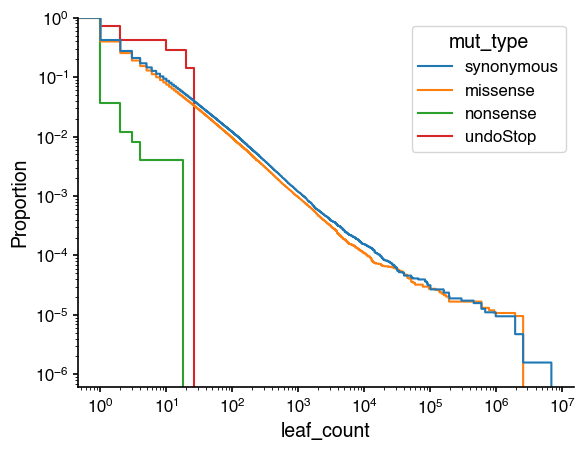

In [74]:
plot_ecdf(orf1a_nested,'leaf_count')

In [ ]:
plot_ecdf(spike_nested,'leaf_count')

In [78]:
S1.to_csv('usher/trimmed/clades/S1_clades.tsv',sep='\t',index=False)

In [79]:
S1_nested.to_csv('usher/trimmed/clades_nested/S1_clades.tsv',sep='\t',index=False)

## RoHo

In [165]:
roho_raw = pd.read_csv('usher/roho_usher_translations.tsv',sep='\t')

In [166]:
def classify_muts(df):
    types = []
    start = df['aa_mutations_re1'].str[0]
    end = df['aa_mutations_re1'].str[-1]
    for s, e in zip(start,end):
        if s == e:
            types.append('synonymous')
        elif e == '*':
            types.append('nonsense')
        elif s == '*':
            types.append('stop_drop')
        else:
            types.append('missense')
    df['mut_type'] = types
    return df

In [167]:
roho = classify_muts(roho_raw)

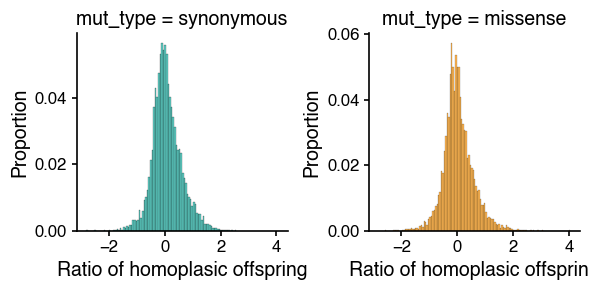

In [193]:
colors = ['#2ec4b6','#ff9f1c','#e71d36']

with sns.color_palette(palette=colors):
    g = sns.FacetGrid(roho[(roho.mut_type!='stop_drop')&(roho.gene=='S')], col="mut_type", hue = 'mut_type',sharey=False)
    g.map(sns.histplot, "single_roho",stat='proportion',).set(xlabel='Ratio of homoplasic offspring')
    g.savefig('figs/fig3/roho_orf8.pdf',dpi=300,bbox_inches='tight')

## Permutation test

In [6]:
def plot_permutation(diction,gene, xlab,var,x,y):
    fig,ax = plt.subplots(ncols=3,nrows=1,tight_layout=True,figsize=(9,3),sharex=True,sharey=True)
    for key,loc in zip(['nonsense','missense','synonymous'],range(3)):
        ax[loc].set_title(gene +': ' + key)
        ax[loc].set_xlabel(xlab)
        ax[loc].hist(diction[key][var]['means'],bins=50)
        mean = diction[key][var]['mean']
        ax[loc].axvline(x=diction[key][var]['mean'],c='k',linestyle='dashed')
        ax[loc].text(x,y,'pvalue: '+str(np.round(diction[key][var]['pvalue'],5)))

In [7]:
with open('usher/trimmed/orf8_1000_nested.json','r') as f:
          permuts_nested = json.load(f)
        
#with open('usher/trimmed/orf8_1000_only1mut.json','r') as f:
 #         permuts = json.load(f)

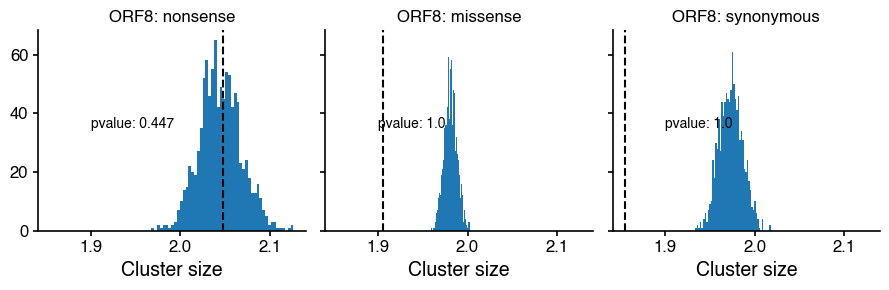

In [10]:
plot_permutation(permuts_nested,'ORF8','Cluster size','leaf_count',1.9,35)

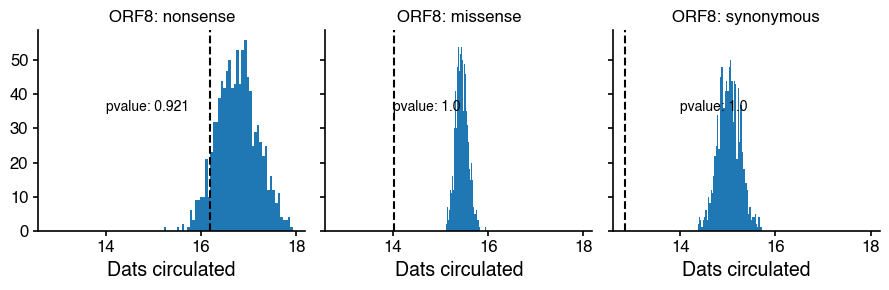

In [11]:
plot_permutation(permuts_nested,'ORF8','Dats circulated','days_circulated',14,35)

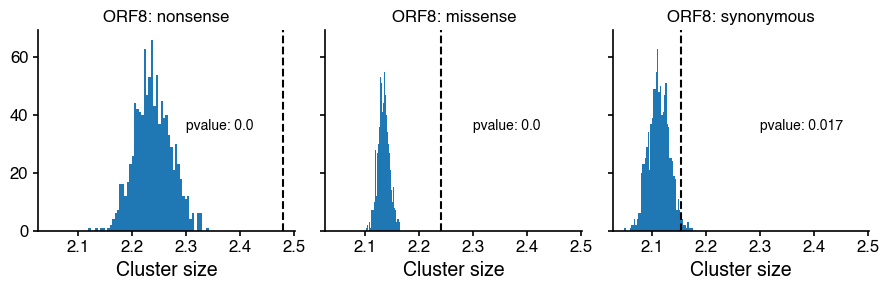

In [192]:
plot_permutation(permuts,'ORF8','Cluster size','leaf_count',2.3,35)